**Credit Card Fraud Prediction with PyCaret**

The PyCaret python library has the ability to automate data science workflow, being a low-code and open-source machine learning library that can be used to speed up experiment cycles. 

This notebook explains the entire machine learning process with PyCaret from data preparation, model training, hyperparameter tuning, model comparison & selection, prediction and saving the model.



In [ ]:
!pip install pycaret
!pip install shap

import pandas as pd # Pandas dataFrame
import numpy as np # Linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns

In this analysis, the dataset from [ULB machine learning group](https://www.kaggle.com/mlg-ulb/creditcardfraud) is used to analyse the imbalanced nature of credit card fraud data.

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/PannaD8ta/Data/master/shrunked_creditcard.csv', sep=',')

# Checks the shape of the data
df.shape


(45000, 31)

In [ ]:
df.head(10).round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,47281.0,1.08,-0.57,0.86,0.20,-0.95,-0.05,-0.48,0.00,1.07,-0.52,-1.06,0.96,1.11,-0.77,-0.37,-0.01,-0.09,-0.59,0.62,0.18,-0.20,-0.46,-0.07,-0.01,0.21,0.96,-0.04,0.03,94.84,0
1,39765.0,1.18,0.14,0.39,1.40,-0.25,-0.21,-0.02,0.06,0.48,-0.09,-0.74,-0.12,-1.35,0.31,0.04,-0.67,0.33,-0.83,-0.36,-0.28,-0.12,-0.15,-0.04,0.06,0.62,-0.31,0.03,0.01,1.00,0
2,67424.0,-0.73,0.96,1.51,-0.12,-0.35,-0.78,0.42,0.21,-0.11,0.24,1.10,-0.55,-2.48,0.76,0.41,0.43,-0.44,0.35,0.21,0.08,-0.22,-0.66,0.04,0.45,-0.28,0.05,0.35,0.17,5.48,0
3,124606.0,2.22,-0.83,-1.48,-1.08,-0.47,-0.85,-0.55,-0.14,-0.53,1.09,0.50,-0.88,-1.40,0.52,-0.13,1.21,-0.10,-0.58,0.80,-0.14,0.44,1.21,-0.04,-0.45,0.16,0.09,-0.05,-0.09,3.50,0
4,73555.0,1.29,0.29,-0.17,0.73,0.36,0.03,0.09,-0.01,-0.21,0.18,0.27,0.52,0.18,0.50,0.30,0.58,-1.10,0.72,0.36,-0.09,0.00,0.03,-0.26,-0.82,0.82,-0.27,0.01,-0.00,3.14,0
5,128051.0,-0.86,1.45,0.98,2.76,1.27,-0.13,1.37,-0.25,-1.81,0.80,-1.42,-0.04,0.82,-0.13,-1.65,0.60,-0.85,-0.79,-1.32,-0.34,-0.16,-0.41,-0.20,-0.13,-0.31,-0.33,-0.04,0.12,57.99,0
6,114858.0,2.14,-0.44,-1.95,-1.37,-0.18,-1.92,0.43,-0.50,1.67,-0.84,-0.86,0.16,-1.36,0.74,0.37,-1.31,0.22,-0.47,1.07,-0.30,-0.01,0.22,0.02,0.08,0.34,-0.13,-0.05,-0.07,9.85,0
7,58519.0,0.38,-1.56,0.53,1.71,-0.94,1.14,-0.31,0.29,1.30,-0.44,-1.80,-0.04,-0.68,-0.43,-0.26,-0.24,0.06,-0.01,-0.29,0.61,0.31,0.37,-0.60,-0.72,0.55,-0.07,0.02,0.09,409.70,0
8,119920.0,0.13,-0.31,-0.77,-2.21,0.34,-0.01,1.09,-0.14,-1.54,0.22,-0.31,-0.98,-0.38,0.30,-0.69,1.47,-0.58,-0.65,1.17,0.34,0.18,0.07,0.16,-1.49,-0.13,-0.32,-0.03,0.02,167.59,0
9,37995.0,1.26,0.49,-0.59,0.65,0.22,-0.91,0.24,-0.11,-0.30,-0.41,1.40,0.15,-0.73,-0.71,0.33,0.78,0.48,0.82,0.10,-0.10,-0.12,-0.34,-0.12,-0.11,0.56,0.37,-0.04,0.02,0.76,0


In [ ]:

len(df[df['Class']==0])

44909

In [ ]:
len(df[df['Class']==1])

91

In [ ]:
print('Non Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Frauds 99.8 % of the dataset
Frauds 0.2 % of the dataset


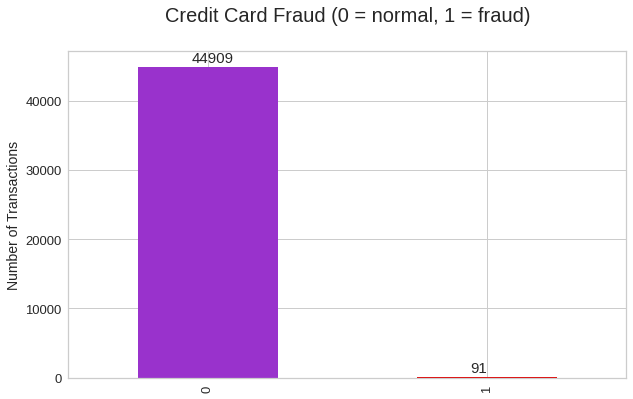

In [30]:
# Distribution of Class Distribution

colours = ["#9932CC", "#DF0101"]

ax = df['Class'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13, color=colours)
ax.set_title('Credit Card Fraud (0 = normal, 1 = fraud)', size = 20, pad = 30)
ax.set_ylabel('Number of Transactions', fontsize = 14)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

**Note:** 91 (2%) out of the 45000 transactions are fraudulent and that means the data is highly imbalance with respect to the target variable 'Class'

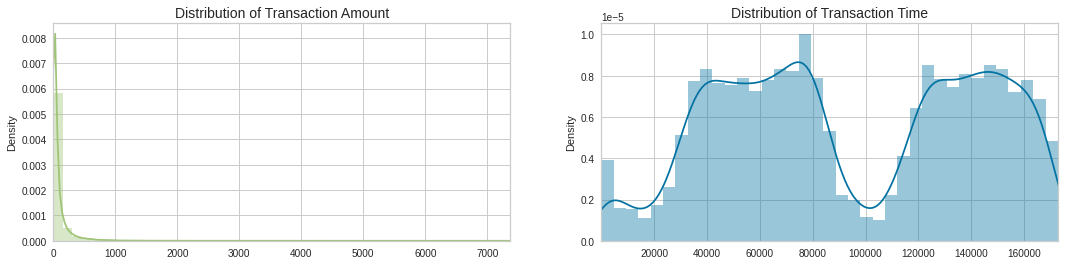

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

**Initialize PyCaret setup**

The setup() function initiates the transformation pipeline to prepare the data for modeling and deployment and it must be called before moving on to other functions in PyCaret.

Most of the configuration is run automaticall, but there are some parameters that can be set manually as below:
- default division ratio is 70:30
- K-fold cross-validation is set to 10 by default
- "session_id" = "random_state"
- "fix_imbalance()" can be used to create synthetic data points for the minority class.

**Note:** The dataset has an unequal distribution of the target class. Hence, the SMOTE (Synthetic Minority Over-sampling Technique) is applied using fix_imbalance().




In [ ]:
# Importing module and initializing setup
# setup() checks for missing values (False = no missing values, True = missing values are present)
from pycaret.classification import *
clf = setup(data = df, target = 'Class', fix_imbalance = True)

,Description,Value
0,session_id,6668
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(45000, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


**Compare Model with Default Setup**





In [ ]:
# Obtaining Accuracy, AUC, Recall, Precision, F1-scores, Kappa, and MCC for different models ranked from accordingly. 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9994,0.9876,0.8405,0.9006,0.8628,0.8625,0.8664,3.254
rf,Random Forest Classifier,0.9993,0.9813,0.7976,0.8706,0.8224,0.8220,0.8278,19.881
xgboost,Extreme Gradient Boosting,0.9991,0.9796,0.8548,0.7804,0.8122,0.8117,0.8144,24.292
lightgbm,Light Gradient Boosting Machine,0.9991,0.9791,0.8262,0.8018,0.8012,0.8008,0.8072,1.479
catboost,CatBoost Classifier,0.9989,0.9852,0.8690,0.7061,0.7702,0.7697,0.7783,29.381
dt,Decision Tree Classifier,0.9976,0.8836,0.7690,0.4889,0.5899,0.5888,0.6079,2.386
gbc,Gradient Boosting Classifier,0.9974,0.9880,0.8690,0.4558,0.5923,0.5912,0.6250,55.591
ada,Ada Boost Classifier,0.9952,0.9689,0.8524,0.2968,0.4371,0.4353,0.4990,10.944
nb,Naive Bayes,0.9921,0.9710,0.7786,0.1848,0.2985,0.2960,0.3768,0.086
qda,Quadratic Discriminant Analysis,0.9906,0.9300,0.8405,0.1852,0.2994,0.2969,0.3876,0.160


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6668, verbose=0,
                     warm_start=False)

In [ ]:
# the Extra Trees Classifer model will be used since it gives us the highest numbers
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9997,1.0000,1.0000,0.8571,0.9231,0.9229,0.9257
1,0.9997,0.9996,0.8571,1.0000,0.9231,0.9229,0.9257
2,0.9994,0.9867,0.8571,0.8571,0.8571,0.8568,0.8568
3,0.9994,0.9196,0.7143,1.0000,0.8333,0.8330,0.8449
4,0.9997,1.0000,1.0000,0.8750,0.9333,0.9332,0.9353
5,0.9994,0.9861,0.7143,1.0000,0.8333,0.8330,0.8449
6,0.9990,0.9974,0.8571,0.7500,0.8000,0.7995,0.8013
7,0.9984,0.9869,0.5714,0.6667,0.6154,0.6146,0.6164
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9997,0.9999,0.8333,1.0000,0.9091,0.9089,0.9127


In [ ]:
# This function implements the hyperparameter tuning using the Random Grid Search in a predefined search space. 
tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.9265,0.8333,0.7143,0.7692,0.7688,0.7711
1,0.9990,0.9898,0.8571,0.7500,0.8000,0.7995,0.8013
2,0.9984,0.9736,0.8571,0.6000,0.7059,0.7051,0.7164
3,0.9990,0.9556,0.7143,0.8333,0.7692,0.7688,0.7711
4,0.9994,1.0000,1.0000,0.7778,0.8750,0.8747,0.8816
5,0.9987,0.9847,0.7143,0.7143,0.7143,0.7136,0.7136
6,0.9981,0.9034,0.5714,0.5714,0.5714,0.5705,0.5705
7,0.9981,0.9941,0.7143,0.5556,0.6250,0.6241,0.6290
8,0.9994,0.9997,1.0000,0.7778,0.8750,0.8747,0.8816
9,0.9997,0.9989,0.8333,1.0000,0.9091,0.9089,0.9127


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=3, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=160, n_jobs=-1, oob_score=False,
                     random_state=6668, verbose=0, warm_start=False)

**Model Evaluation**

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
et_predict = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9992,0.9156,0.6087,0.875,0.7179,0.7176,0.7294


In [23]:
f_et = finalize_model(et)

In [ ]:
save_model(et, model_name = 'extra_tree_model')


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

**Conclusion**

PyCaret's automated functions helps shorten the time for data researchers that allows swift preparation of the imbalance data and the deployment of the model. 

The top models selected were:
1. **Extra Trees Classifier** with an AUC score of **0.9876**
2. **Random Forest Classifier** with an AUC score of **0.9813**
3. **Extreme Gradient Boosting** with an AUC score of **0.9796**

**References:**

[1] PyCaret, https://pycaret.readthedocs.io/en/latest/

[2] Creating the Whole Machine Learning Pipeline with PyCaret, https://towardsdatascience.com/creating-the-whole-machine-learning-pipeline-with-pycaret-db39a3006840

[3] Credit Card Fraud Detection Predictive Models, https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models

[4] 
Credit Fraud || Dealing with Imbalanced Datasets, https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets